### 2. Выбор модели для прогнозирования ВВП ЕС

In [633]:
library(forecast)
library(ggplot2)
library(dplyr)


## ЕС

In [625]:
df_eu  <-  read.csv(file="hts_eu_a10.csv", header=TRUE, sep=",", row.names =1 )
df_eu  <-  df_eu/1000
var_freq  <- 4    
var_start_year  <- 2000   
gdp_agg <- df_eu_sums <-  rowSums(df_eu)
gdp_agg  <- ts(gdp_agg, frequency = var_freq, start = var_start_year) 

In [626]:
train_end_year  <-  2016
tset_start_year  <-  2017

In [627]:
train <- window(gdp_agg, end=c(train_end_year,var_freq))
test <- window(gdp_agg, start=c(tset_start_year,1))

In [628]:
var_h  <- 8

In [630]:
var_window  <-  48
var_cv_low   <- 48
var_cv_high   <- 67

### tsCV()

In [631]:
gdp_arima_top_cv <- function(x, h){forecast(Arima(ts(x, 
    frequency = var_freq, start = var_start_year), order=c(3,0,0),
    seasonal=c(2,0,0), include.drift = TRUE, include.constant = TRUE), h=h)}
e_arima_top  <-  tsCV(gdp_agg, gdp_arima_top_cv, h=var_h, 
                      window=var_window)[var_cv_low:var_cv_high,]
sqrt(mean(e_arima_top^2, na.rm=TRUE))

[1] 66.91502

In [632]:
var_freq  <- 4    
var_start_year  <- 2000   
var_h  <- 8
var_window  <-  48 - 1
var_topup  <-  1
var_iter   <- (length(gdp_agg)+var_topup)/var_freq-(var_window+1)/var_freq-2

ac <- c()
for (i in 0:(var_iter*var_freq)){
    st_year  <-  var_start_year + i/var_freq
    train_start  <- st_year 
    train_end  <- st_year + 1/var_freq*(var_window)
    test_start  <- st_year + 1/var_freq*(var_window+1) 
    test_end  <-  st_year + 1/var_freq*(var_window+var_h)
    
    print(c(train_start, train_end, test_start, test_end))
    
    }

[1] 2000.00 2011.75 2012.00 2013.75
[1] 2000.25 2012.00 2012.25 2014.00
[1] 2000.50 2012.25 2012.50 2014.25
[1] 2000.75 2012.50 2012.75 2014.50
[1] 2001.00 2012.75 2013.00 2014.75
[1] 2001.25 2013.00 2013.25 2015.00
[1] 2001.50 2013.25 2013.50 2015.25
[1] 2001.75 2013.50 2013.75 2015.50
[1] 2002.00 2013.75 2014.00 2015.75
[1] 2002.25 2014.00 2014.25 2016.00
[1] 2002.50 2014.25 2014.50 2016.25
[1] 2002.75 2014.50 2014.75 2016.50
[1] 2003.00 2014.75 2015.00 2016.75
[1] 2003.25 2015.00 2015.25 2017.00
[1] 2003.50 2015.25 2015.50 2017.25
[1] 2003.75 2015.50 2015.75 2017.50
[1] 2004.00 2015.75 2016.00 2017.75
[1] 2004.25 2016.00 2016.25 2018.00
[1] 2004.50 2016.25 2016.50 2018.25
[1] 2004.75 2016.50 2016.75 2018.50
[1] 2005.00 2016.75 2017.00 2018.75


In [545]:
var_freq  <- 4    
var_start_year  <- 2000   
var_h  <- var_h
var_window  <-  48 - 1
var_topup  <-  1
var_iter   <- (length(gdp_agg)+var_topup)/var_freq-(var_window+1)/var_freq-2


In [546]:
ac <- list()

for (i in 0:(var_iter*var_freq - var_topup)){
    st_year  <-  var_start_year + i/var_freq
    train_start  <- st_year 
    train_end  <- st_year + 1/var_freq*(var_window)
    test_start  <- st_year + 1/var_freq*(var_window+1) 
    test_end  <-  st_year + 1/var_freq*(var_window+var_h)
    
    print(c(train_start, train_end, test_start, test_end))
    
    if (i == 0){
        train <- window(gdp_agg, end=train_end)}
    else{
        train <- window(gdp_agg, start=train_start, end=train_end)
    }
    
    if (i == var_iter*var_freq){
#         test <- window(gdp_agg, start=test_start-1/var_freq)
         break
    }
    else{
        test <- window(gdp_agg, start=test_start, end=test_end)
    }

#     test <- window(gdp_agg, start=test_start, end=test_end)
    

    
    gdp_arima  <- forecast(Arima(train, order=c(3,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.mean = TRUE), h = 8  )

#     print(test)
#     print(gdp_arima)
    
    ac[[i+1]]  <-  accuracy(gdp_arima, test)
    
    }

[1] 2000.00 2011.75 2012.00 2013.75
[1] 2000.25 2012.00 2012.25 2014.00
[1] 2000.50 2012.25 2012.50 2014.25
[1] 2000.75 2012.50 2012.75 2014.50
[1] 2001.00 2012.75 2013.00 2014.75
[1] 2001.25 2013.00 2013.25 2015.00
[1] 2001.50 2013.25 2013.50 2015.25
[1] 2001.75 2013.50 2013.75 2015.50
[1] 2002.00 2013.75 2014.00 2015.75
[1] 2002.25 2014.00 2014.25 2016.00
[1] 2002.50 2014.25 2014.50 2016.25
[1] 2002.75 2014.50 2014.75 2016.50
[1] 2003.00 2014.75 2015.00 2016.75
[1] 2003.25 2015.00 2015.25 2017.00
[1] 2003.50 2015.25 2015.50 2017.25
[1] 2003.75 2015.50 2015.75 2017.50
[1] 2004.00 2015.75 2016.00 2017.75
[1] 2004.25 2016.00 2016.25 2018.00
[1] 2004.50 2016.25 2016.50 2018.25
[1] 2004.75 2016.50 2016.75 2018.50


In [547]:
var_acc_metrics  <-  c(1,2,5)
cn  <- colnames(ac[[1]])[var_acc_metrics]

In [548]:
var_iter

[1] 5

In [549]:
ac_list  <- list()
k=0
df_acc  <-  data.frame(matrix(ncol=2*length(var_acc_metrics),nrow=length(ac)))
colnames(df_acc)  <-  colnames(ac[[1]])[var_acc_metrics] 
df_acc  <-  cbind(df_acc, seq(1, length(ac)))
for (i in var_acc_metrics){
    k=k+1    
    for (j in 1:length(ac)){
        for (l in 1:2){
            m = k + (l-1)*3
            if (l == 1){
                colnames(df_acc)[m]  <-  paste(cn[k],'train', sep="_")
             } else {
                colnames(df_acc)[m]  <-  paste(cn[k],'test', sep="_")
            }   
            df_acc[j,m] <- ac[[j]][l,i] 
        }
    }
}

In [550]:
colnames(df_acc)[2*length(var_acc_metrics)+1]  <-  'Iteration'

In [551]:
# Basic line plot with points

plots_train_test  <-  list()

var_col_test  <-  'blue'
var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 0
    
    if  (i==1) {
        
        plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_train)) +
            geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_train)) +
            geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Квартальные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_train)) +
            geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }


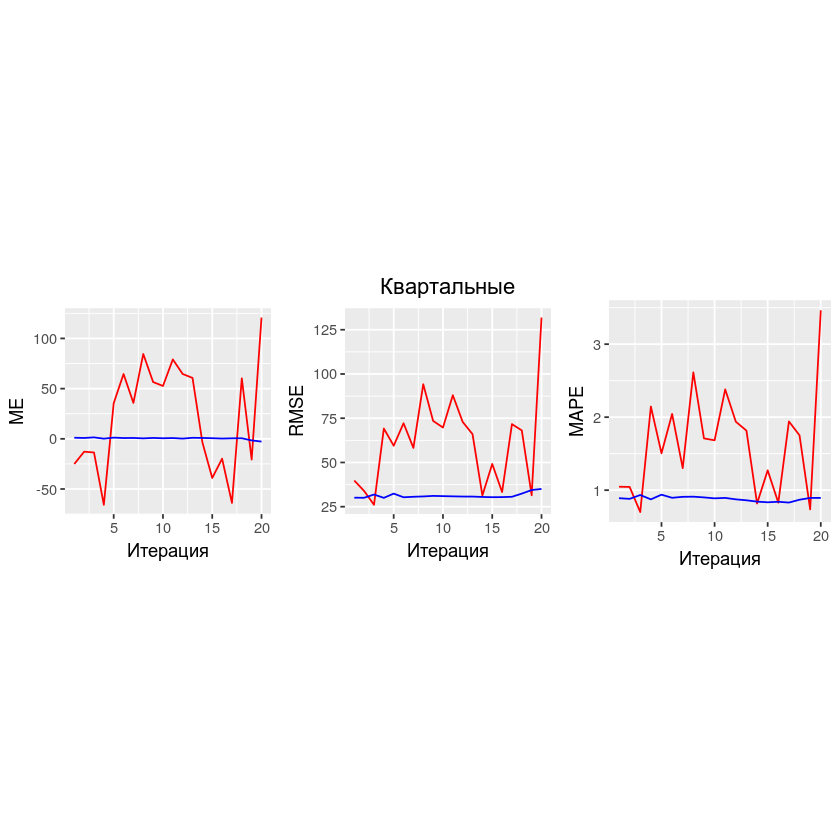

In [552]:
library(gridExtra)
grid.arrange(grobs = plots_train_test, ncol = 3)

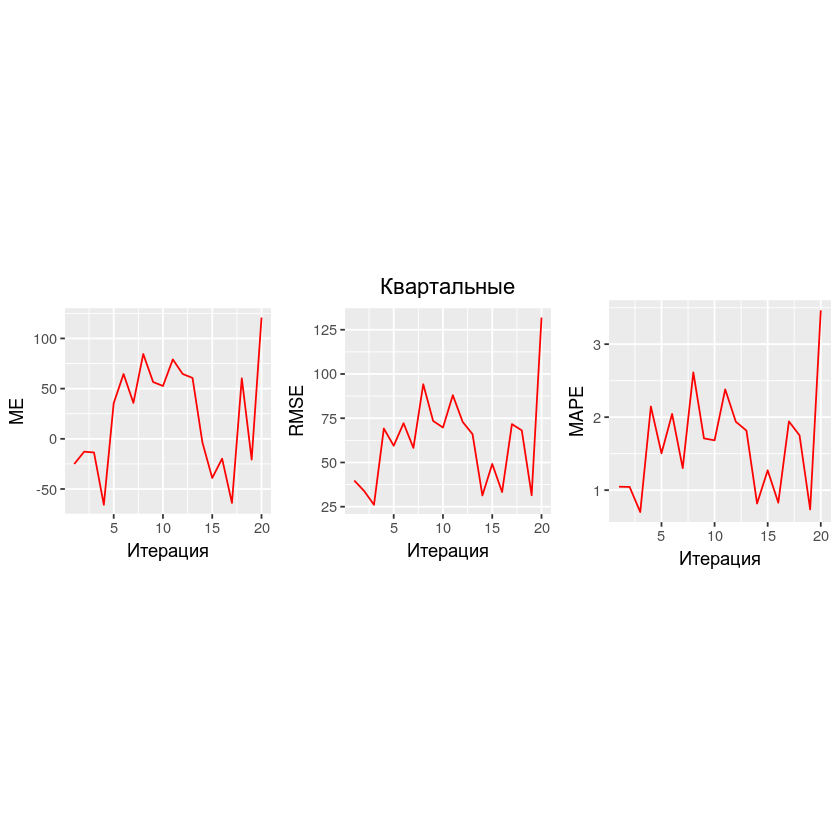

In [553]:
# Basic line plot with points

plots_test_all  <-  list()

var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 0
    
    if  (i==1) {
        
        plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Квартальные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

grid.arrange(grobs = plots_test_all, ncol = 3)

In [554]:
# Basic line plot with points

plots_test_not_all  <-  list()

var_not_all  <-  c(df_acc$Iteration[c(T, rep(F,var_freq-1))], df_acc$Iteration[length(df_acc$Iteration)] )

var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 0
    
    if  (i==1) {
        
        plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Квартальные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

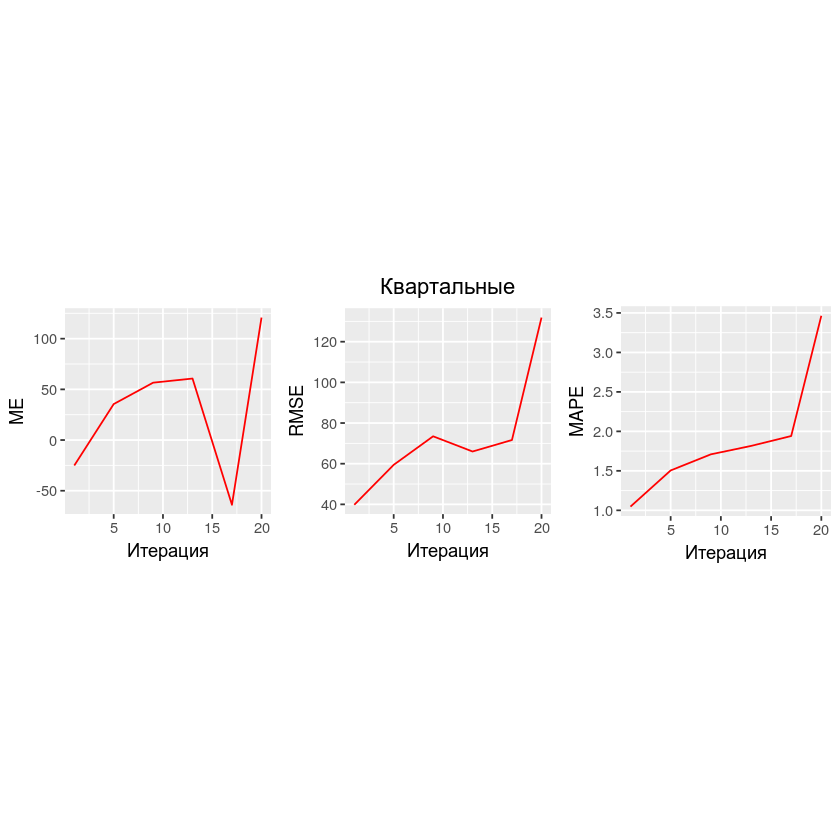

In [555]:
grid.arrange(grobs = plots_test_not_all, ncol = 3)


## США

In [556]:
df_eu  <-  read.csv(file="hts_us_ind_filled.csv", header=TRUE, sep=",", row.names =1 )

In [557]:
df_eu  <-  df_eu/1000

In [558]:
var_freq  <- 4    
var_start_year  <- 2005  

In [559]:
gdp_agg <- df_eu_sums <-  rowSums(df_eu)
gdp_agg  <- ts(gdp_agg, frequency = var_freq, start = var_start_year) 

In [560]:
train_end_year  <-  2016
tset_start_year  <-  2017

In [561]:
train <- window(gdp_agg, end=c(train_end_year,var_freq))
test <- window(gdp_agg, start=c(tset_start_year,1))

In [562]:
var_h  <- 8

In [563]:
length(gdp_agg)-8

[1] 46

In [564]:
gdp_agg

         Qtr1     Qtr2     Qtr3     Qtr4
2005 14811.63 14902.34 15023.37 15102.28
2006 15315.30 15359.04 15362.28 15464.91
2007 15477.09 15549.71 15618.09 15731.69
2008 15625.55 15697.70 15582.14 15216.20
2009 15077.89 15057.17 15107.87 15246.07
2010 15272.96 15416.13 15513.43 15593.29
2011 15535.66 15633.07 15617.25 15821.95
2012 15927.74 15976.31 15983.43 15994.99
2013 16128.30 16136.38 16254.91 16372.60
2014 16316.98 16522.48 16733.98 16809.04
2015 16949.40 17070.24 17129.69 17147.05
2016 17237.31 17306.78 17369.38 17427.95
2017 17501.51 17637.46 17757.34 17851.87
2018 17934.57 18122.00                  

In [565]:
var_freq  <- 4    
var_start_year  <- 2005   
var_h  <- 8
var_window  <-  28 - 1
var_topup  <-  2
var_iter   <- (length(gdp_agg)+var_topup)/var_freq-(var_window+1)/var_freq-2

In [566]:
var_cv_low   <- var_window + 1
var_cv_high   <- length(gdp_agg) - var_h

In [567]:
gdp_arima_top_cv <- function(x, h){forecast(Arima(ts(x, 
    frequency = var_freq, start = var_start_year), order=c(4,0,0), 
    include.drift = TRUE, include.constant = TRUE), h=h)}
e_arima_top  <-  tsCV(gdp_agg, gdp_arima_top_cv, h=var_h, 
                      window=var_window)[var_cv_low:var_cv_high,]
sqrt(mean(e_arima_top^2, na.rm=TRUE))

[1] 444.4842

In [568]:
ac <- list()

for (i in 0:(var_iter*var_freq - var_topup)){
    st_year  <-  var_start_year + i/var_freq
    train_start  <- st_year 
    train_end  <- st_year + 1/var_freq*(var_window)
    test_start  <- st_year + 1/var_freq*(var_window+1) 
    test_end  <-  st_year + 1/var_freq*(var_window+var_h)
    
    print(c(train_start, train_end, test_start, test_end))
    
    if (i == 0){
        train <- window(gdp_agg, end=train_end)}
    else{
        train <- window(gdp_agg, start=train_start, end=train_end)
    }
    
    if (i == var_iter*var_freq){
        test <- window(gdp_agg, start=test_start-1/var_freq)}
    else{
        test <- window(gdp_agg, start=test_start, end=test_end)
    }

    test <- window(gdp_agg, start=test_start, end=test_end)
    
    print(c(length(train), length(test)))

    
    gdp_arima  <- forecast(Arima(train, order=c(4,0,0), 
    include.drift = TRUE, include.constant = TRUE), h = var_h  )
    
    ac[[i+1]]  <-  accuracy(gdp_arima, test)
    
    }

[1] 2005.00 2011.75 2012.00 2013.75
[1] 28  8
[1] 2005.25 2012.00 2012.25 2014.00
[1] 28  8
[1] 2005.50 2012.25 2012.50 2014.25
[1] 28  8
[1] 2005.75 2012.50 2012.75 2014.50
[1] 28  8
[1] 2006.00 2012.75 2013.00 2014.75
[1] 28  8
[1] 2006.25 2013.00 2013.25 2015.00
[1] 28  8
[1] 2006.50 2013.25 2013.50 2015.25
[1] 28  8
[1] 2006.75 2013.50 2013.75 2015.50
[1] 28  8
[1] 2007.00 2013.75 2014.00 2015.75
[1] 28  8
[1] 2007.25 2014.00 2014.25 2016.00
[1] 28  8
[1] 2007.50 2014.25 2014.50 2016.25
[1] 28  8
[1] 2007.75 2014.50 2014.75 2016.50
[1] 28  8
[1] 2008.00 2014.75 2015.00 2016.75
[1] 28  8
[1] 2008.25 2015.00 2015.25 2017.00
[1] 28  8
[1] 2008.50 2015.25 2015.50 2017.25
[1] 28  8
[1] 2008.75 2015.50 2015.75 2017.50
[1] 28  8
[1] 2009.00 2015.75 2016.00 2017.75
[1] 28  8
[1] 2009.25 2016.00 2016.25 2018.00
[1] 28  8
[1] 2009.50 2016.25 2016.50 2018.25
[1] 28  8


In [569]:
var_acc_metrics  <-  c(1,2,5)
cn  <- colnames(ac[[1]])[var_acc_metrics]

In [570]:
ac_list  <- list()
k=0
df_acc  <-  data.frame(matrix(ncol=2*length(var_acc_metrics),nrow=length(ac)))
colnames(df_acc)  <-  colnames(ac[[1]])[var_acc_metrics] 
df_acc  <-  cbind(df_acc, seq(1, length(ac)))
for (i in var_acc_metrics){
    k=k+1    
    for (j in 1:length(ac)){
        for (l in 1:2){
            m = k + (l-1)*3
            if (l == 1){
                colnames(df_acc)[m]  <-  paste(cn[k],'train', sep="_")
             } else {
                colnames(df_acc)[m]  <-  paste(cn[k],'test', sep="_")
            }   
            df_acc[j,m] <- ac[[j]][l,i] 
        }
    }
}

In [571]:
colnames(df_acc)[2*length(var_acc_metrics)+1]  <-  'Iteration'

In [572]:
colMeans(df_acc)

ME_train  RMSE_train  MAPE_train     ME_test   RMSE_test   MAPE_test 
 -1.3200942  92.1810253   0.4596733 352.4553299 406.3892569   2.0938751 
  Iteration 
 10.0000000

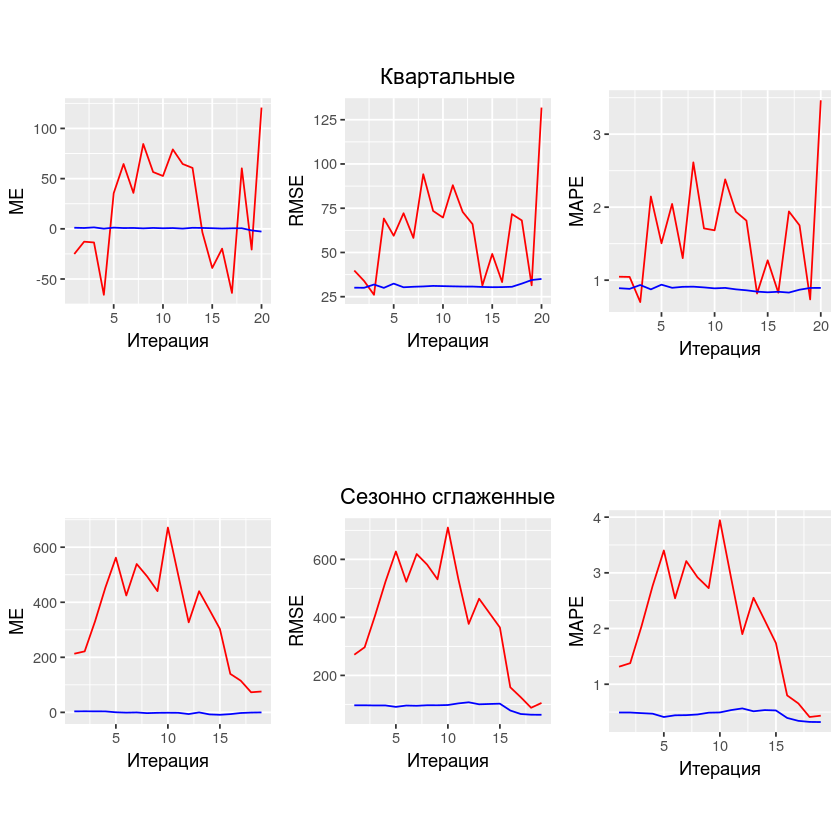

In [573]:
var_col_test  <-  'blue'
var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 3
    
    if  (i==1) {
        
        plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_train)) +
            geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_train)) +
            geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Сезонно сглаженные") +
            theme(plot.title = element_text(hjust = 0.5))   
        } else if (i==3)  {
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_train)) +
            geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }



grid.arrange(grobs = plots_train_test, ncol = 3, nrow =2)

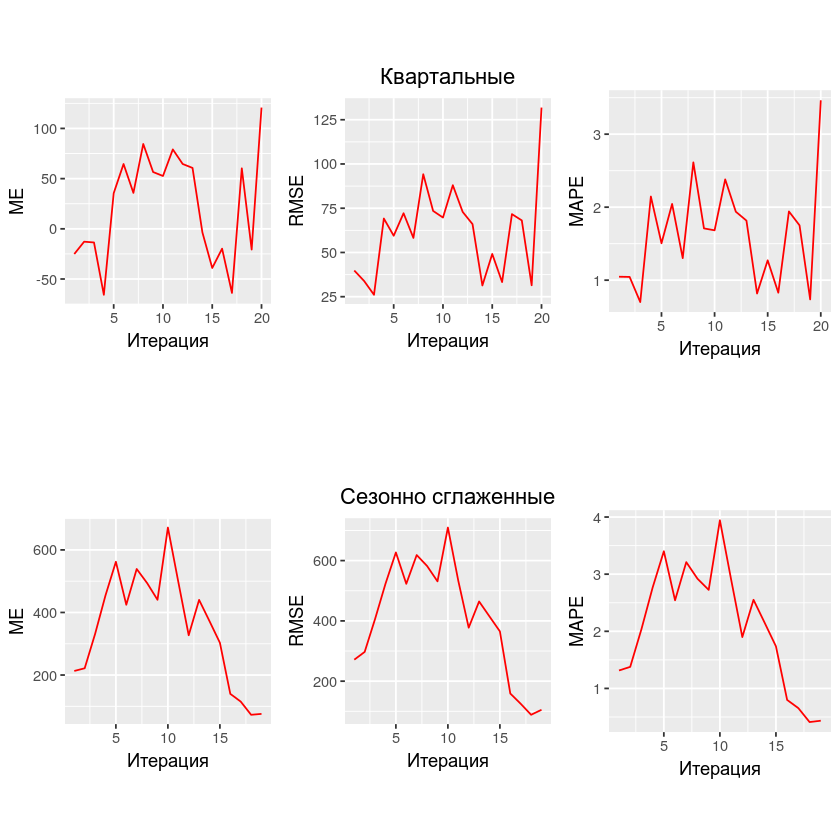

In [574]:
# Basic line plot with points
var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 3
    
    if  (i==1) {
        
        plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Сезонно сглаженные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

grid.arrange(grobs = plots_test_all, ncol = 3, nrow = 2)

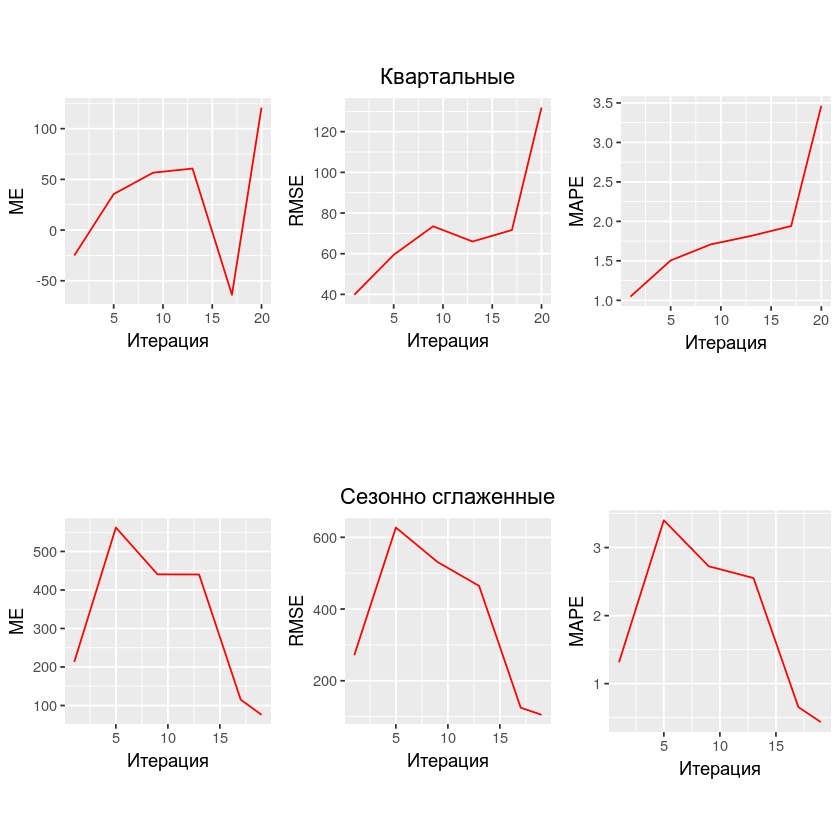

In [575]:
# Basic line plot with points

var_not_all  <-  c(df_acc$Iteration[c(T, rep(F,var_freq-1))], df_acc$Iteration[length(df_acc$Iteration)] )

var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 3
    
    if  (i==1) {
        
        plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Сезонно сглаженные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

grid.arrange(grobs = plots_test_not_all, ncol = 3)


## РФ


In [602]:
df_eu  <-  read.csv(file="hts_rus_summed.csv", header=TRUE, sep=",", row.names =1 )

In [603]:
df_eu  <-  df_eu

In [604]:
var_freq  <- 12    
var_start_year  <- 2006

In [605]:
gdp_agg <- df_eu_sums <-  rowSums(df_eu)
gdp_agg  <- ts(gdp_agg, frequency = var_freq, start = var_start_year) 

In [606]:
train_end_year  <-  2016
tset_start_year  <-  2017

In [607]:
train <- window(gdp_agg, end=c(train_end_year,var_freq))
test <- window(gdp_agg, start=c(tset_start_year,1))

In [608]:
var_h  <- 24

In [609]:
var_window  <-  96
var_cv_low   <- 96
var_cv_high   <- 156-24

In [610]:
96-12

[1] 84

In [611]:
var_freq  <- 12    
var_start_year  <- 2006   
var_h  <- 24
var_window  <-  84 - 1
var_topup  <-  -1
var_iter   <- (length(gdp_agg)+var_topup)/var_freq-(var_window+1)/var_freq-2

In [612]:
var_cv_low   <- var_window + 1
var_cv_high   <- length(gdp_agg) - var_h

In [613]:
time(gdp_agg)[1:12]

[1] 2006.000 2006.083 2006.167 2006.250 2006.333 2006.417 2006.500 2006.583
 [9] 2006.667 2006.750 2006.833 2006.917

In [614]:
require(svMisc)

In [615]:
# gdp_arima_top_cv <- function(x, h){forecast(Arima(ts(x, 
#     frequency = var_freq, start = var_start_year), order=c(11,0,0),
#     seasonal=c(2,0,0), include.drift = TRUE, include.constant = TRUE), h=h)}
# e_arima_top  <-  tsCV(gdp_agg, gdp_arima_top_cv, h=var_h, 
#                       window=var_window)[var_cv_low:var_cv_high,]
# sqrt(mean(e_arima_top^2, na.rm=TRUE))

In [617]:
ac <- list()
err_list  <- c()
for (i in 0:(var_iter*var_freq - var_topup)){
    st_year  <-  var_start_year + i/var_freq
    train_start  <- st_year 
    train_end  <- st_year + 1/var_freq*(var_window)
    test_start  <- st_year + 1/var_freq*(var_window+1) 
    test_end  <-  st_year + 1/var_freq*(var_window+var_h)
    
#     print(c(train_start, train_end, test_start, test_end))
    
    if (i == 0){
        train <- window(gdp_agg, end=train_end)}
    else{
        train <- window(gdp_agg, start=train_start, end=train_end)
    }
    
    if (i == var_iter*var_freq){
        test <- window(gdp_agg, start=test_start-1/var_freq)}
    else{
        test <- window(gdp_agg, start=test_start, end=test_end)
    }

    test <- window(gdp_agg, start=test_start, end=test_end)
    
#     print(c(length(train), length(test)))

    
    model  <-  tryCatch( list(Arima(train, order=c(11,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.constant = TRUE, method = "ML") , 0), 
            error = function(e) 
               {tryCatch( list( Arima(train, order=c(11,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.constant = TRUE, method = "CSS"), i+1), 
                         error = function(e)              
                            list( Arima(train, order=c(11,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.constant = TRUE, method = "CSS", optim.method = "CG"), i+1))
                         }
    )
    
    
    gdp_arima  <- forecast(model[[1]], h = var_h  )
    
    if (model[[2]]!=0){
        err_list <-  c(err_list,model[[2]])
    }
    
    ac[[i+1]]  <-  accuracy(gdp_arima, test)
    progress(i, progress.bar = TRUE)

    }

[1] 2006.000 2012.917 2013.000 2014.917
        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2013 -21804  -5608 -15157  -9048  -8227   6992  23186  23066  11709  11702
2014 -14727  -1700  -6177  -2526  -5848   6309  23731  19854  12060  10071
        Nov    Dec
2013   5839    263
2014    438  -2700
[1] 2006.083 2013.000 2013.083 2015.000
        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2013         -5608 -15157  -9048  -8227   6992  23186  23066  11709  11702
2014 -14727  -1700  -6177  -2526  -5848   6309  23731  19854  12060  10071
2015 -25453                                                               
        Nov    Dec
2013   5839    263
2014    438  -2700
2015              
[1] 2006.167 2013.083 2013.167 2015.083
        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2013               -15157  -9048  -8227   6992  23186  23066  11709  11702
2014 -14727  -1700  -6177  -2526  -5848   6309  23731  19854  12060  100

In [591]:
var_acc_metrics  <-  c(1,2,5)
cn  <- colnames(ac[[1]])[var_acc_metrics]

In [592]:
ac_list  <- list()
k=0
df_acc  <-  data.frame(matrix(ncol=2*length(var_acc_metrics),nrow=length(ac)))
colnames(df_acc)  <-  colnames(ac[[1]])[var_acc_metrics] 
df_acc  <-  cbind(df_acc, seq(1, length(ac)))
for (i in var_acc_metrics){
    k=k+1    
    for (j in 1:length(ac)){
        for (l in 1:2){
            m = k + (l-1)*3
            if (l == 1){
                colnames(df_acc)[m]  <-  paste(cn[k],'train', sep="_")
             } else {
                colnames(df_acc)[m]  <-  paste(cn[k],'test', sep="_")
            }   
            df_acc[j,m] <- ac[[j]][l,i] 
        }
    }
}

In [593]:
colnames(df_acc)[2*length(var_acc_metrics)+1]  <-  'Iteration'

In [594]:
colMeans(df_acc)

ME_train   RMSE_train   MAPE_train      ME_test    RMSE_test    MAPE_test 
    67.72927   6075.75234    160.35286 -11656.16989  14613.78580    267.46308 
   Iteration 
    25.50000

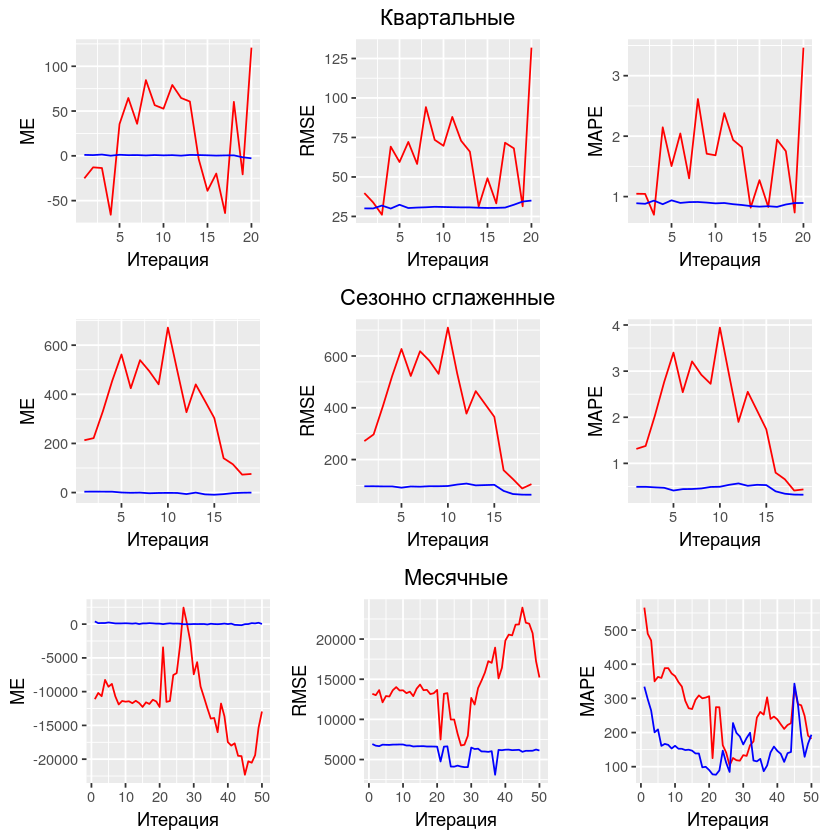

In [595]:
var_col_test  <-  'blue'
var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 6
    
    if  (i==1) {
        
        plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_train)) +
            geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_train)) +
            geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Месячные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_train)) +
            geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }



grid.arrange(grobs = plots_train_test, ncol = 3, nrow =3)

In [596]:
err_list

[1] 21 24 25 26 27 28 29 37

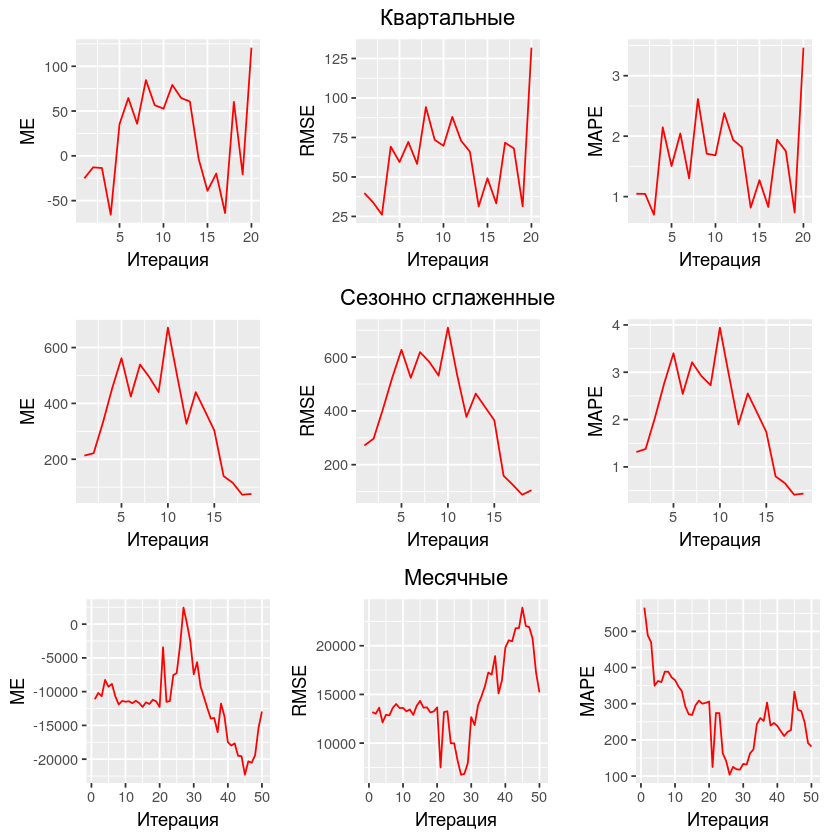

In [597]:
# Basic line plot with points

var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 6
    
    if  (i==1) {
        
        plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Месячные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

grid.arrange(grobs = plots_test_all, ncol = 3)

In [598]:
var_not_all  <-  df_acc$Iteration[c(T, rep(F,var_freq-1))]
var_not_all

[1]  1 13 25 37 49

In [599]:
var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 6
    
    if  (i==1) {
        
        plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Месячные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

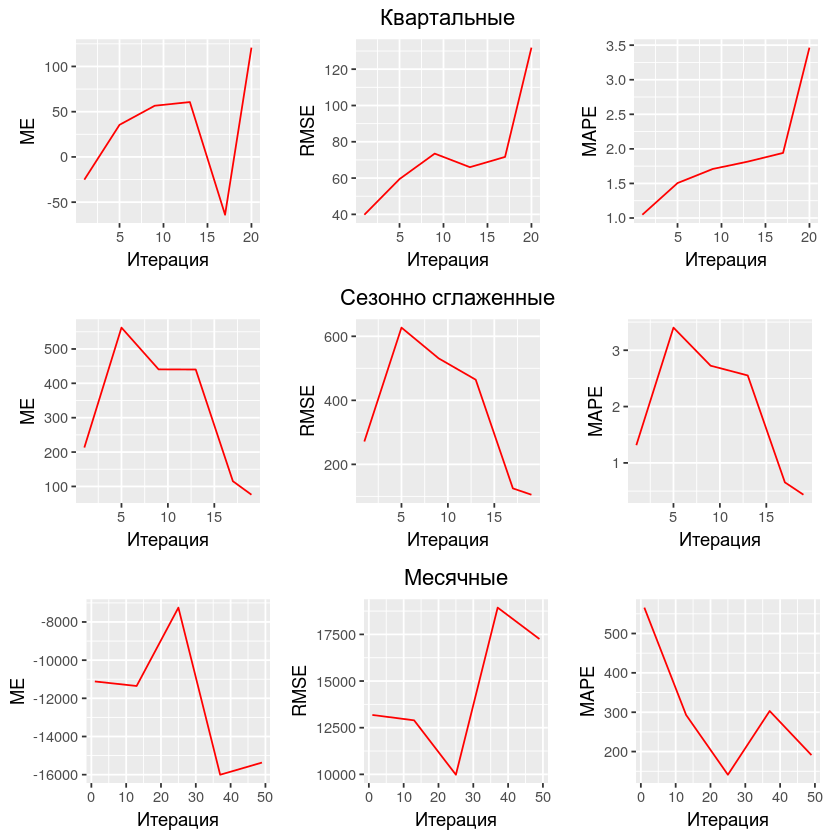

In [600]:
grid.arrange(grobs = plots_test_not_all, ncol = 3)

In [601]:
# Save a single object to a file
saveRDS(plots_train_test, "plots_train_test.rds")
saveRDS(plots_test_all, "plots_test_all.rds")
saveRDS(plots_test_not_all, "plots_test_not_all.rds")
# Restore it under a different name
# my_data <- readRDS("mtcars.rds")